In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [9]:
# Import the performance data
performance_df = pd.read_excel("NBA stats.xlsx", sheetname="Player performance")
performance_df.head()

,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,4.6,5.4,6.7,3.3,2.1,0.2,2.0,15,2,30.1
1,James Harden,Houston Rockets,26,82,41,41,38.1,8.7,19.7,43.9,...,5.3,6.1,7.5,4.6,1.7,0.6,2.8,23,3,29.0
2,Kevin Durant,Oklahoma City Thunder,27,72,52,20,35.8,9.7,19.2,50.5,...,7.6,8.2,5.0,3.5,1.0,1.2,1.9,27,1,28.2
3,DeMarcus Cousins,Sacramento Kings,25,65,29,36,34.6,9.2,20.5,45.1,...,9.1,11.5,3.3,3.8,1.6,1.4,3.6,47,1,26.9
4,LeBron James,Cleveland Cavaliers,31,76,56,20,35.6,9.7,18.6,52.0,...,6.0,7.4,6.8,3.3,1.4,0.6,1.9,28,3,25.3


In [53]:
salary_df = pd.read_excel("NBA stats.xlsx", sheetname="2016-2017 Salaries")
salary_df.head()

,RK,NAME,TEAM,SALARY
0,1,"Mike Conley, PG",Memphis Grizzlies,26540100
1,2,"Al Horford, C",Boston Celtics,26540100
2,3,"Carmelo Anthony, SF",New York Knicks,24559380
3,4,"Damian Lillard, PG",Portland Trail Blazers,24328425
4,5,"Chris Bosh, PF",Miami Heat,23741060


In [54]:
#creating a new dataframe, with split names
salary_name_df = pd.DataFrame(salary_df['NAME'].str.split(',',1).tolist(), columns = ['NAME','POSITION', ])

In [55]:
#creating a new dataframe, with slit names, without dropping t
salary_df["NAME"], salary_df["POSITION"] = zip(*salary_df['NAME'].str.split(',',1).tolist())


In [56]:
salary_df.head()

,RK,NAME,TEAM,SALARY,POSITION
0,1,Mike Conley,Memphis Grizzlies,26540100,PG
1,2,Al Horford,Boston Celtics,26540100,C
2,3,Carmelo Anthony,New York Knicks,24559380,SF
3,4,Damian Lillard,Portland Trail Blazers,24328425,PG
4,5,Chris Bosh,Miami Heat,23741060,PF


In [57]:
performance_df.head()

,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,4.6,5.4,6.7,3.3,2.1,0.2,2.0,15,2,30.1
1,James Harden,Houston Rockets,26,82,41,41,38.1,8.7,19.7,43.9,...,5.3,6.1,7.5,4.6,1.7,0.6,2.8,23,3,29.0
2,Kevin Durant,Oklahoma City Thunder,27,72,52,20,35.8,9.7,19.2,50.5,...,7.6,8.2,5.0,3.5,1.0,1.2,1.9,27,1,28.2
3,DeMarcus Cousins,Sacramento Kings,25,65,29,36,34.6,9.2,20.5,45.1,...,9.1,11.5,3.3,3.8,1.6,1.4,3.6,47,1,26.9
4,LeBron James,Cleveland Cavaliers,31,76,56,20,35.6,9.7,18.6,52.0,...,6.0,7.4,6.8,3.3,1.4,0.6,1.9,28,3,25.3


In [65]:
df = performance_df.merge(salary_df, left_on='Player', right_on='NAME')

In [73]:
df.rename(columns={'PTS': 'POINT AVERAGE PER GAME'}, inplace=True)

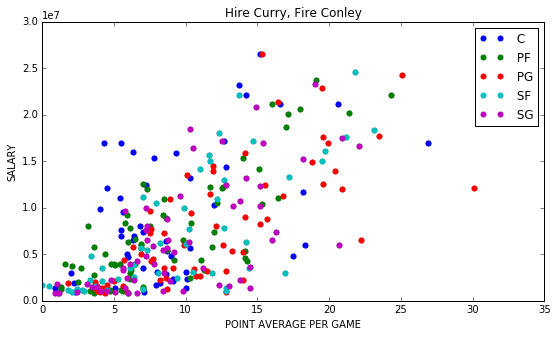

In [110]:
ax = df.plot(kind='scatter', x='POINT AVERAGE PER GAME', y='SALARY', figsize = (9,5) )
ax.set_title("Hire Curry, Fire Conley")
for category, group in df.groupby('POSITION'):
    ax.plot(group['POINT AVERAGE PER GAME'], group['SALARY'], marker='o', linestyle='', label=category, markeredgewidth=0)
ax.set_xlim([0, 35])
ax.set_ylim([0, 30000000])
ax.legend()
plt.savefig('conley-vs-curry.pdf', transparent=True, bbox_inches='tight')

In [99]:
Under_15m = df[df['SALARY'] < 15000000].sort_values(by='POINT AVERAGE PER GAME', ascending=False)
Under_15m.head(1)

,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,POINT AVERAGE PER GAME,RK,NAME,TEAM_y,SALARY,POSITION
0,Stephen Curry,Golden State Warriors,28,79,71,8,34.2,10.2,20.2,50.4,...,0.2,2.0,15,2,30.1,68,Stephen Curry,Golden State Warriors,12112359,PG


In [101]:
Above_25m = df[df['SALARY'] > 25000000].sort_values(by='SALARY', ascending=False)
Above_25m.head(2)

,Player,TEAM_x,AGE,GP,W,L,MIN,FGM,FGA,FG%,...,BLK,PF,DD2,TD3,POINT AVERAGE PER GAME,RK,NAME,TEAM_y,SALARY,POSITION
45,Mike Conley,Memphis Grizzlies,28,56,33,23,31.4,5.3,12.4,42.2,...,0.3,1.8,4,0,15.3,1,Mike Conley,Memphis Grizzlies,26540100,PG
47,Al Horford,Atlanta Hawks,30,82,48,34,32.1,6.5,12.8,50.5,...,1.5,2.0,17,0,15.2,2,Al Horford,Boston Celtics,26540100,C


In [ ]:
#Stephen Curry, 28
#Golden State Warriors
#30.1 point average in 79 Games
#Salary: $12.1m

#Mike Conley, 28
#Memphis Grizzlies
#15.3 point average in 56 Games
#Salary: $26.5m